In [12]:
import numpy as np
import matplotlib.pyplot as plt
from bosonStar import *

massInCU = 2e-77
aInCU = 5e-74
totalMassInCU = 0.1
#massInCU = 2e-77
#aInCU = 1e-73
#totalMassInCU = 0.1
dtInCU = 5000.0
bigT = 4000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) 

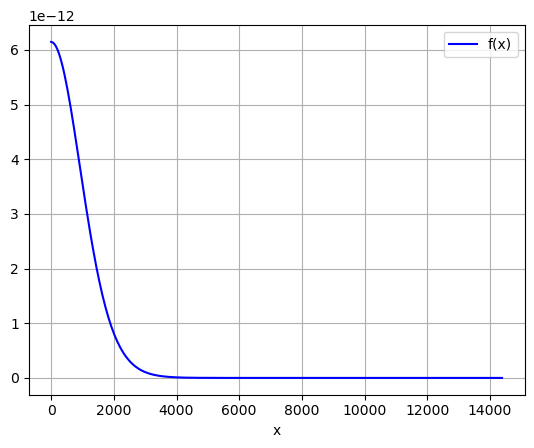

In [13]:
allThings = outputProfile(massInCU, aInCU, totalMassInCU)
#Hot Fix
x = allThings["x"][1::2]
psi = allThings["profile"][1::2]

In [14]:
def lengthCodeUnitToSI(cu):
    return cu/6.77193e-6/100.0

def lengthSIToPlanckUnit(SI):
    return SI/1.616255e-35

def densityCodeUnitToSI(cu):
    return cu*1000.0/1.619e-18

def densitySIToPlanckUnit(SI):
    return SI/5.155e96

def massCodeUnitToSI(cu):
    return cu/5.02788e-34/1000

def massSIToPlanckUnit(SI):
    return SI/2.176434e-8

def timeCodeUnitToSI(cu):
    return cu/2.03017e5

def timeSIToPlanckUnit(SI):
    return SI/5.391247e-44

In [15]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m

In [16]:
HBAR = 1.0
G = 1.0
c = 1.0

In [17]:
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 2.735422698176033e+40
Omega: 7.31225818599693e-43
Epsilon (Should be 1): 1.0000000000000002
Delta: 10.493082434141407
New G: 0.8350129688321715


In [18]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
x = np.concatenate((np.flip(-x), x))

psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
psi = np.concatenate((np.flip(psi), psi))
normalization = np.trapz(2.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x)
psi = psi/normalization
psi = psi.astype(complex)

for index, value in enumerate(psi):
    if(value<1e-8):
        psi[index] = 0
psi = psi.astype(complex)

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA

print(psi)
print(dt)

[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 2.84572961e-07+0.j
 6.24277842e-0

In [19]:
dx = x[1]-x[0]
T = np.zeros((size,size))
TSph = np.zeros((size,size))
V = np.zeros((size,size))
Q = np.zeros((size,size))
V2Grav = np.zeros((size,size))
I = np.identity(size)
I = I.astype(complex)

phi = -np.exp(-x*x)/1000.0
phi[0] = 0.0
phi[size-1] = 0.0

In [20]:
def setupT():
    global T, TSph
    for i in range(size):
        T[i][i] = -2.0
        if(i!=size-1):
            T[i][i+1] = 1.0
            TSph[i][i+1] = 1.0/2.0/x[i]
        if(i!=0):
            T[i][i-1] = 1.0
            TSph[i][i-1] = -1.0/2.0/x[i]

    T = -1.0/2.0/dx/dx*T
    TSph = -1.0/dx*TSph
    T = T.astype(complex)
    TSph = TSph.astype(complex)

def setupQ():
    global Q
    for i in range(size):
        if(np.absolute(psi[i]) >= 1e-8):
            Q[i][i] = delta*np.absolute(psi[i])*np.absolute(psi[i])

    Q = Q.astype(complex)

def setupV2Grav():
    global V2Grav, phi, psi

    phi[0] = 0.0
    phi[size-1] = 0.0

    VGrav = np.zeros((size,size))
    VGrav2 = np.zeros((size))
    for i in range(size):
        if(i!=size-1 and i!=0):
            VGrav[i][i+1] = 1.0/2.0 + 1.0/2.0*dx/x[i]
            VGrav[i][i-1] = 1.0/2.0 - 1.0/2.0*dx/x[i]
        if(np.absolute(psi[i]) >= 1e-8):
            VGrav2[i] = 2.0*np.pi*dx*dx*np.absolute(psi[i])*np.absolute(psi[i])*GM

    toler = 3e-8
    count = 0

    while(True):
        phiNew = np.dot(VGrav, phi) - VGrav2
        error = np.abs((phiNew-phi)/phi)
        phi = phiNew
        count = count + 1
        if(np.nanmax(error[error!=np.inf])<toler):
            print(count)
            break
        
    for i in range(size//2):
        if(np.absolute(psi[i]) >= 1e-8):
            V2Grav[i][i] = phi[size-i-1]
            V2Grav[size-i-1][size-i-1] = phi[size-i-1]
        #Regulate
        phi[i] = phi[size-i-1]

    V2Grav.astype(complex)

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    #U1 = I + 1.0j*dt/2.0*(T+TSph+V2Grav)
    #U2 = I - 1.0j*dt/2.0*(T+TSph+V2Grav)

In [21]:
setupT()

In [22]:
setupU1U2()
hello = []
ts = []
oldGM = GM
newGM = GM*1.5
for t in range(bigT):
    #Pertubation
    if(t==0):
        GM = newGM
    if(t==10):
        GM = oldGM


    print(t, t*dt, np.absolute(psi[size//2]))
    if(GM == oldGM):
        hello.append(np.absolute(psi[size//2])*np.absolute(psi[size//2]))
        ts.append(t*dt)

    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    #Regulate
    for i in range(size//2):
        psi[i] = psi[size-i-1]

    V2Grav.astype(complex)

    if t%100 == 0:
        plt.plot(x, np.absolute(psi)*np.absolute(psi))

plt.xlabel(r"$r$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

0 0.0 0.04061184805876761


/tmp/ipykernel_62738/1042373627.py:45: RuntimeWarning: divide by zero encountered in divide
  error = np.abs((phiNew-phi)/phi)
/tmp/ipykernel_62738/1042373627.py:45: RuntimeWarning: overflow encountered in divide
  error = np.abs((phiNew-phi)/phi)
/tmp/ipykernel_62738/1042373627.py:45: RuntimeWarning: invalid value encountered in divide
  error = np.abs((phiNew-phi)/phi)


43336
1 0.3340410855163411 0.04062173805275277
351
2 0.6680821710326822 0.04065132312760955
659
3 1.0021232565490232 0.04070035945791922
910
4 1.3361643420653644 0.04076846144752094
1114
5 1.6702054275817055 0.04085511867836965
1286
6 2.0042465130980465 0.04095971664795497
1438
7 2.3382875986143876 0.04108155915527459
1578
8 2.6723286841307288 0.04121989320314684
1711
9 3.00636976964707 0.04137393093415295
1839
10 3.340410855163411 0.04154286961341835
40195
11 3.6744519406797522 0.04171542257475065
2605
12 4.008493026196093 0.04188015190748764
1613
13 4.3425341117124345 0.04203614397809948
1821
14 4.676575197228775 0.042182774283950834
1905
15 5.010616282745117 0.04231969623080983
1957
16 5.3446573682614575 0.042446812060520735
1989
17 5.678698453777798 0.04256423349610314
2006
18 6.01273953929414 0.04267224007376079
2013
19 6.3467806248104806 0.0427712355125547
2014
20 6.680821710326822 0.042861704736697065
2012
21 7.014862795843163 0.042944178815963824
2007
22 7.3489038813595045 0.04

In [ ]:
plt.plot(ts, hello)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

In [ ]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.2)
plt.ylim(0.0,1.0)
plt.xlabel("f (1/s)")